## Trabajo Practico N2
1. Normalizar los valores de RGB del pixel
2. RGB -> YIQ (utilizando la segunda matriz)
3. Y’ := aY;
4. I’ := bI; Q’ := bQ;
5. Chequear que Y’ <= 1 (para que no se vaya de rango)
6. Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226
7. Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)
8. Convertir R’G’B’ a bytes y graficar el pixel

In [ ]:
# Instalacion librerias
import numpy as np 
import matplotlib.pyplot as plt
import imageio

In [14]:
def RGB_to_YIQ(rgb):
    yiq = np.zeros(rgb.shape)
    yiq[:,:,0] = 0.229*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2] #BandaY
    yiq[:,:,1] = 0.595716*rgb[:,:,0] - 0.274453*rgb[:,:,1] - 0.321263*rgb[:,:,2] #BandaI
    yiq[:,:,2] = 0.211456*rgb[:,:,0] - 0.522591*rgb[:,:,1] + 0.311135*rgb[:,:,2] #BandaQ
    return yiq

In [38]:
def YIQ_to_RGB(yiq):
    rgb = np.zeros(yiq.shape)
    rgb[:,:,0] = 1*yiq[:,:,0] + 0.9663*yiq[:,:,1] + 0.6210*yiq[:,:,2] #BandaR
    rgb[:,:,1] = 1*yiq[:,:,0] - 0.2721*yiq[:,:,1] - 0.6474*yiq[:,:,2] #BandaG
    rgb[:,:,2] = 1*yiq[:,:,0] - 1.1070*yiq[:,:,1] + 1.7046*yiq[:,:,2] #BandaB
    return rgb

In [83]:
def modificar_YIQ(yiq,a,b):
    yiq[:,:,0] = np.clip(yiq[:,:,0] * a,0.,1.)
    yiq[:,:,1] = np.clip(yiq[:,:,1] * b,-0.5957,0.5957) 
    yiq[:,:,2] = np.clip(yiq[:,:,2] * b,-0.5226,0.5226)
    return yiq

### Valores de prueba
* a=0.7 y 0.4 se espera que sea mas oscura
* a=1.2 y 1.5 se espera que sea mas clara
* b=0.5 y 0 disminuye la saturacion llevando a blanco y negro
* b=1.2 y 1.5 aumenta la saturacion
* a=0.8 y b=5
* a=0.8 y b=0.2


Ingrese valor de coeficiente de luminancia: 1
Ingrese valor de coeficiente de saturación: 1


C:\Users\Fabian\AppData\Local\Temp\ipykernel_10684\170261454.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('Charly.bmp')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


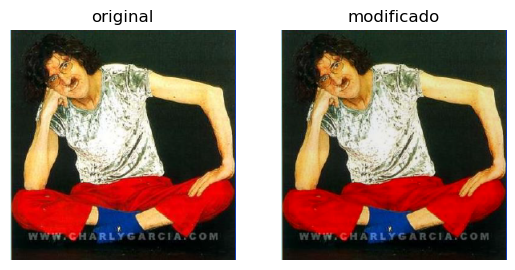

In [116]:
a = input("Ingrese valor de coeficiente de luminancia: ")
b = input("Ingrese valor de coeficiente de saturación: ")
im = imageio.imread('Charly.bmp')
im = np.clip(im /255.,0.,1.) #normalizando [0,1]
yiq = RGB_to_YIQ(im)
yiq_modificado = modificar_YIQ(yiq,float(a),float(b))
rgb = YIQ_to_RGB(yiq_modificado)

plt.subplot(1,2,1)
plt.imshow(im)
plt.title('original')
plt.axis('off')  

plt.subplot(1,2,2)
plt.imshow(rgb)
plt.title('modificado')
plt.axis('off')    
plt.show()
